In [1]:
import matplotlib.pyplot as plt
from atomtoolkit import Q_
from atomtoolkit.atom import Atom, Transition
import atomtoolkit.render.grotrian as grt
import numpy as np
from pprint import pprint

In [2]:
a = Atom.load('species/Yb_II_173.atom')
a.B = Q_(5.0, 'G')

In [3]:
# plt.figure(figsize=(16, 16))
# grt.draw_levels(a)
# plt.show()

In [13]:
g = grt.Grotrian()
g.add_level(a.levels['4f14.6s 2S1/2'], strategy=grt.zeeman_level_table)
g.add_level(a.levels['4f13.(2F*).6s2 2F*7/2'], strategy=grt.zeeman_level_table, hf_scale=40000.0, z_scale=5, width=1.1, sublevel_width='degeneracy', color=(0,0,0,0.7))
g.add_level(a.levels['4f14.5d 2D3/2'], strategy=grt.zeeman_level_table, hf_scale=40000.0, z_scale=5)
g.add_level(a.levels['4f14.5d 2D5/2'], strategy=grt.zeeman_level_table, hf_scale=40000.0, z_scale=5, sublevel_width='degeneracy', width = 1.0)
g.add_level(a.levels['4f14.6p 2P*1/2'], strategy=grt.zeeman_level_table)
g.add_level(a.levels['4f14.6p 2P*3/2'], strategy=grt.zeeman_level_table, hf_scale=40000.0, z_scale=5)

In [14]:
g.levels_df

,level,strategy,w,x1,x0,kwargs
0,"[F=2, F=3]",<function zeeman_level_table at 0x13daff040>,0.8,0.0,None,{}
1,"[F=1, F=2, F=3, F=4, F=5, F=6]",<function zeeman_level_table at 0x13daff040>,1.1,0.0,None,"{'hf_scale': 40000.0, 'z_scale': 5, 'width': 1..."
2,"[F=1, F=2, F=3, F=4]",<function zeeman_level_table at 0x13daff040>,0.8,0.0,None,"{'hf_scale': 40000.0, 'z_scale': 5}"
3,"[F=0, F=1, F=2, F=3, F=4, F=5]",<function zeeman_level_table at 0x13daff040>,1.0,0.0,None,"{'hf_scale': 40000.0, 'z_scale': 5, 'sublevel_..."
4,"[F=2, F=3]",<function zeeman_level_table at 0x13daff040>,0.8,0.0,None,{}
5,"[F=1, F=2, F=3, F=4]",<function zeeman_level_table at 0x13daff040>,0.8,0.0,None,"{'hf_scale': 40000.0, 'z_scale': 5}"


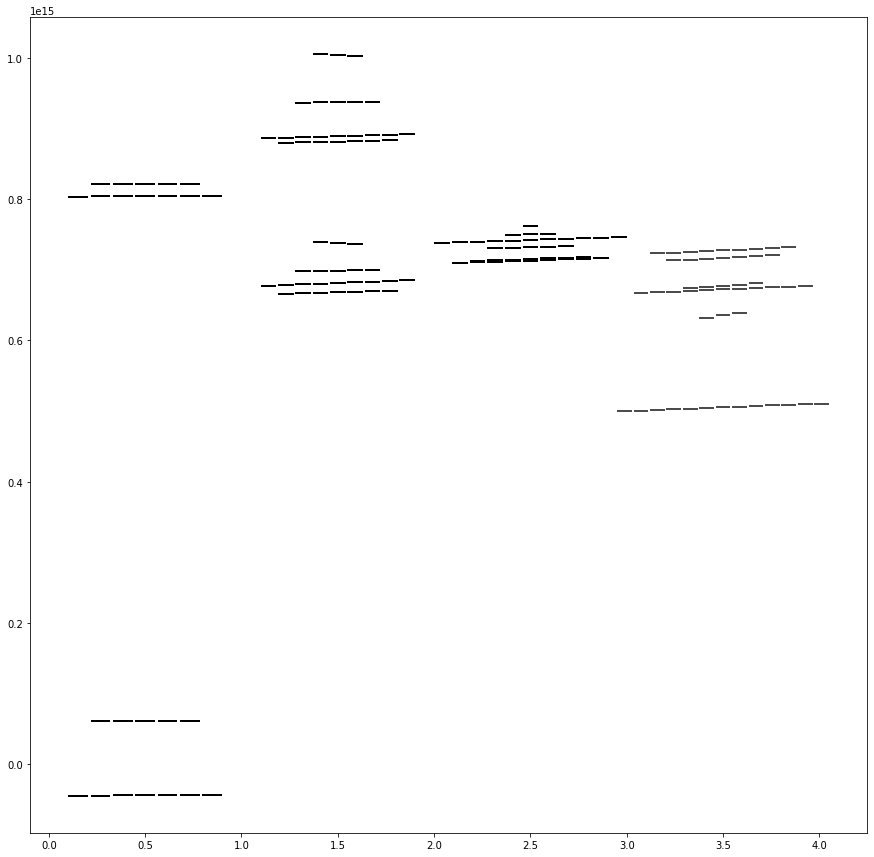

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
grt.MPLGrotrianRenderer.render(g, ax)
ax.autoscale()
plt.show()

In [7]:
a.levels.list_names()

['4f14.6s 2S1/2',
 '4f13.(2F*).6s2 2F*7/2',
 '4f13.(2F*).6s2 2F*5/2',
 '4f14.5d 2D3/2',
 '4f14.5d 2D5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2',
 '4f14.6p 2P*1/2',
 '4f14.6p 2P*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[9/2]*9/2',
 '4f13.(

In [10]:
list(enumerate(a.levels['4f14.6s 2S1/2'].sublevels()))

[(0, HFLevel(name = 4f14.6s 2S1/2 F=2, level=6120170140.0 hertz, 0 sublevels)),
 (1,
  HFLevel(name = 4f14.6s 2S1/2 F=3, level=-4371550100.0 hertz, 0 sublevels))]

In [16]:
import pandas as pd
df = pd.DataFrame(columns=['x', 'y', 'z'])
df = pd.concat([df, pd.DataFrame([[1, 2, {'a': 3, 'b': 4}], [5, 6, {'a': 7, 'b': 8}]], columns=['x', 'y', 'z'])])

In [17]:
df

,x,y,z
0,1,2,"{'a': 3, 'b': 4}"
1,5,6,"{'a': 7, 'b': 8}"


In [19]:
df['z']

0    {'a': 3, 'b': 4}
1    {'a': 7, 'b': 8}
Name: z, dtype: object